In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-whitegrid'])

In [2]:
sys.path.append("../src")

In [3]:
from utils import start_experiments, ExportConfig, ExperimentSetup

# Experiments analysis

In [4]:
sat_bgc_experiments = ["GCGOBGC","S3OLCIBGC"]

In [5]:
ExperimentSetup.ALL_REGIONS

['NA', 'STG']

In [6]:
r2_50 = pd.DataFrame()
rmse_50 = pd.DataFrame()
mae_50 = pd.DataFrame()
mapd_50 = pd.DataFrame()

In [7]:
for region in ExperimentSetup.ALL_REGIONS:
    for experiment in sat_bgc_experiments:
        
        # Select depth
        depth = '50'

        # Metrics file
        metrics_file = f"../results/{region}/{depth}/{experiment}/Model/Metrics/{region}_{depth}_{experiment}_depth_metrics.csv"
        metrics_df = pd.read_csv(metrics_file, index_col=0, header=None)

        #R2
        r2_series = metrics_df.loc["R2"]
        r2_series.name = f"{region}_{experiment}"
        # Store dataframe in a list with its associated (region, experiment)
        r2_50 = pd.concat([r2_50, r2_series], axis=1)

        #MAE
        r2_series = metrics_df.loc["R2"]
        r2_series.name = f"{region}_{experiment}"
        # Store dataframe in a list with its associated (region, experiment)
        r2_50 = pd.concat([r2_50, r2_series], axis=1)


In [8]:
# Define som viz parameters based on the experiment
depth_value = int(depth) 
depth_range = np.arange(1, 52, 2)  
yticks = (-1,-11,-21,-31,-41,-51)

KeyError: 'NA_S3OLCIBGC'

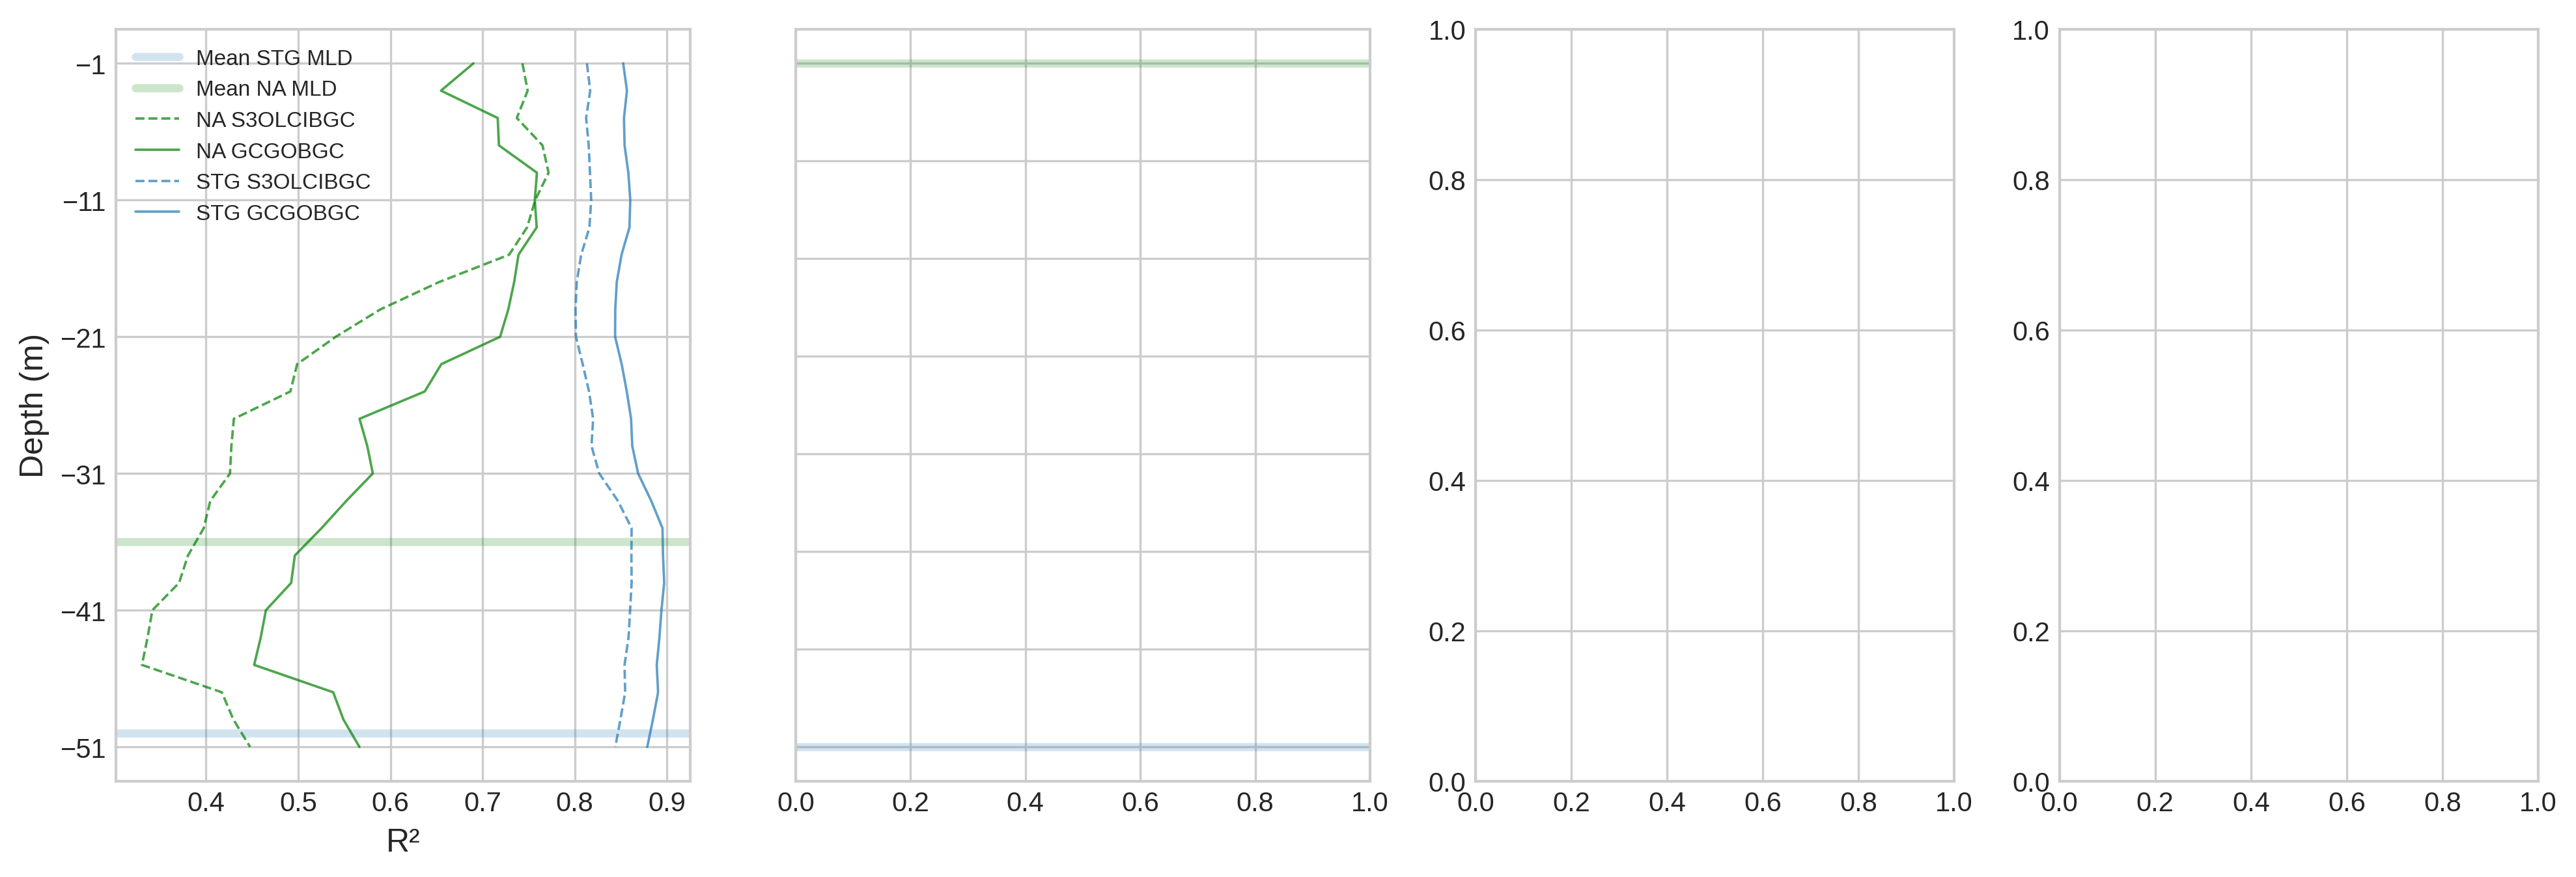

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5), dpi=300, gridspec_kw={'width_ratios': [1.2, 1.2, 1, 1]}, sharey=False)

colors = {'NA': 'g', 'STG': '#1f77b4'}

# --- R² Plot ---
ax = axes[0]
ax.axhline(y=-50, color=colors['STG'], linewidth=3, alpha=0.2, label='Mean STG MLD')
ax.axhline(y=-36, color=colors['NA'], linewidth=3, alpha=0.2,label='Mean NA MLD')

ax.plot(r2_50["NA_S3OLCIBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="--", linewidth=0.9, label="NA S3OLCIBGC")
ax.plot(r2_50["NA_GCGOBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="-", linewidth=0.9, label="NA GCGOBGC")
ax.plot(r2_50["STG_S3OLCIBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="--", linewidth=0.9, label="STG S3OLCIBGC")
ax.plot(r2_50["STG_GCGOBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="-", linewidth=0.9, label="STG GCGOBGC")

ax.set_xlabel("R\u00B2", fontsize=12)
ax.set_ylabel("Depth (m)", fontsize=12)
ax.set_yticks(yticks)
ax.tick_params(labelsize=10)
ax.legend(fontsize=8)

# --- MAE Plot ---
ax = axes[1]
ax.axhline(y=-50, color=colors['STG'], linewidth=3, alpha=0.2)
ax.axhline(y=-36, color=colors['NA'], linewidth=3, alpha=0.2)
ax.set_yticklabels([])
ax.plot(mae_50["NA_S3OLCIBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="--", linewidth=0.9)
ax.plot(mae_50["NA_GCGOBGC"], -depth_range, color=colors['NA'], alpha=0.7, linestyle="-", linewidth=0.9)
ax.plot(mae_50["STG_S3OLCIBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="--", linewidth=0.9)
ax.plot(mae_50["STG_GCGOBGC"], -depth_range, color=colors['STG'], alpha=0.7, linestyle="-", linewidth=0.9)
ax.set_yticks(yticks)
ax.set_xlabel("MAE $(m^{-1})$", fontsize=12)
ax.tick_params(labelsize=10)

# --- MAPD Violin NA ---
ax = axes[2]
xticks_na = ['NA\nS3OLCI+BGC', 'NA\nGCGO+BGC']
violin_plot_na = ax.violinplot(
    [mapd_50["NA_S3OLCIBGC"], mapd_50["NA_GCGOBGC"]],
    showmeans=True, vert=True, showmedians=False, showextrema=True
)
for i, pc in enumerate(violin_plot_na["bodies"], 1):
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('black')
    pc.set_linewidth(0.8)

ax.set_xticks([1, 2])
ax.set_xticklabels(xticks_na, fontsize=10)
ax.tick_params(labelsize=10)
ax.set_ylabel('MAPD (%)', fontsize=12)

# --- MAPD Violin STG ---
ax = axes[3]
xticks_stg = ['STG\nS3OLCI+BGC', 'STG\nGCGO+BGC']
violin_plot_stg = ax.violinplot(
    [mapd_50["STG_S3OLCIBGC"], mapd_50["STG_GCGOBGC"]],
    showmeans= True, vert=True, showmedians=False, showextrema=True
)
for pc in violin_plot_stg["bodies"]:
    pc.set_facecolor(colors['STG'])
    pc.set_edgecolor('black')
    pc.set_linewidth(0.8)

ax.set_xticks([1, 2])
ax.set_xticklabels(xticks_stg, fontsize=10)
ax.tick_params(labelsize=10)

plt.tight_layout()
if export_fig_comparative:
    plt.savefig(f"../results/Comparisons/{depth}/Comparison_{depth}_R2_MAE_MAPD_sat_bgc.pdf")
plt.show()
